In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import os
import warnings
from matplotlib import pyplot as plt
from matplotlib import axes
warnings.simplefilter(action='ignore')
%matplotlib inline

provinces = [10, 41, 50, 70, 90]

which_model = 'default_prophet'

folder = '../../output/' + which_model + '/all_prov_monthly/all_prov_monthly_'

In [2]:
# loads the error dataframe
def load_error_df(folder, how_many_years_out=1):
    # load the data
    file_path = folder + str(how_many_years_out) + '/monthly_errors_' + str(how_many_years_out) + '.csv'
    error_df = pd.read_csv(file_path)
    error_df['province'] = error_df['province'].astype(int)
    error_df['year'] = error_df['year'].astype(int)
    error_df['peak_month_error'] = error_df['peak_month_error'].astype(int)
    
    return error_df

In [17]:
def b_load_error_df(folder, how_many_years_out=1):
    # load the data
    file_path = folder + str(how_many_years_out) + '/biweekly_errors_' + str(how_many_years_out) + '.csv'
    error_df = pd.read_csv(file_path)
    error_df['province'] = error_df['province'].astype(int)
    error_df['year'] = error_df['year'].astype(int)
    error_df['peak_month_error'] = error_df['peak_month_error'].astype(int)
    
    return error_df

In [3]:
# makes a graph for specified province, however many years out
def make_a_graph(province, df, how_many_years_out=1):
    prov_df = df.loc[df['province'] == province]
    ax = sns.barplot(x='year', y='monthly_case_rmse', data=prov_df, palette="Blues_d", ci=0)
    ax.set(xlabel='Year', ylabel='RMSE for Monthly Case Counts')
    plt.title('Province ' + str(province) + ', ' + str(how_many_years_out) + ' Year(s) Out')
    plt.show()

In [4]:
# makes a graph for each province for provinces made the specified number of years out
def make_a_buncha_graphs(how_many_years_out=1):
    monthly_errors = load_error_df(folder, how_many_years_out)

    for province in provinces:
        make_a_graph(province, monthly_errors, how_many_years_out)

In [6]:
# make_a_buncha_graphs(1)

In [7]:
# load all the data and combine into one dataframe
# make a column for the "trajectories" should be able to track the error when training on the same number of months
# the color of the error bars should be the same for all the data trained on 2006, then all the data trained on 2006+2007, etc

all_years_out_df = pd.DataFrame(columns=['province','year','monthly_case_rmse','year_total_error','peak_error','peak_month_error', 'how_many_years_out'])
trajectory_index_list = []

for i in range(1, 11):
    df = load_error_df(folder, i)
    df['how_many_years_out'] = i
    all_years_out_df = pd.concat([all_years_out_df, df])
    
    trajectory_index_list.append(np.arange(i, 11))

traj_ind_all_prov = np.repeat(trajectory_index_list, 5)
traj_ind_all_prov = np.concatenate(traj_ind_all_prov)
all_years_out_df['trajectory'] = traj_ind_all_prov

all_years_out_df['province'] = all_years_out_df['province'].astype(int)
all_years_out_df['year'] = all_years_out_df['year'].astype(int)
all_years_out_df['peak_month_error'] = all_years_out_df['peak_month_error'].astype(int)
all_years_out_df['how_many_years_out'] = all_years_out_df['how_many_years_out'].astype(int)
all_years_out_df.head()

,province,year,monthly_case_rmse,year_total_error,peak_error,peak_month_error,how_many_years_out,trajectory
0,10,2007,6918.611158,68055.133816,1021.902836,0,1,1
1,10,2008,354.612023,3175.230127,657.240202,4,1,2
2,10,2009,350.743696,4024.685753,289.928920,1,1,3
3,10,2010,261.048009,582.812746,357.389466,0,1,4
4,10,2011,235.575738,899.041839,60.443342,4,1,5


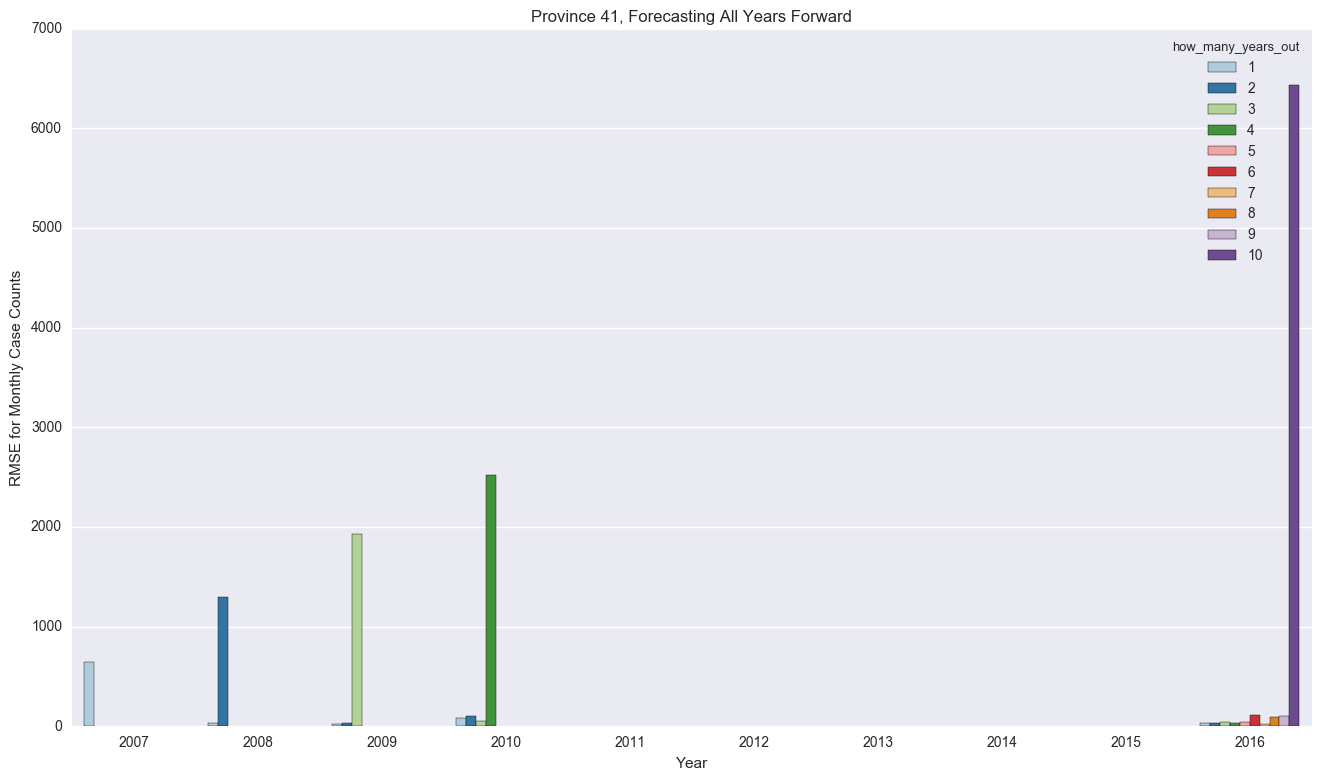

In [13]:
province = 41

prov_df = all_years_out_df.loc[all_years_out_df['province'] == province]

sns.set()
plt.subplots(figsize=(16,9))
# plt.rcParams['axes.facecolor'] = 'white'
# hue is either trajectory or how_many_years_out
ax = sns.barplot(x='year', y='monthly_case_rmse', data=prov_df, ci=0, hue='how_many_years_out', palette='Paired')
ax.set(xlabel='Year', ylabel='RMSE for Monthly Case Counts')
plt.title('Province ' + str(province) + ', ' + 'Forecasting All Years Forward')
plt.show()

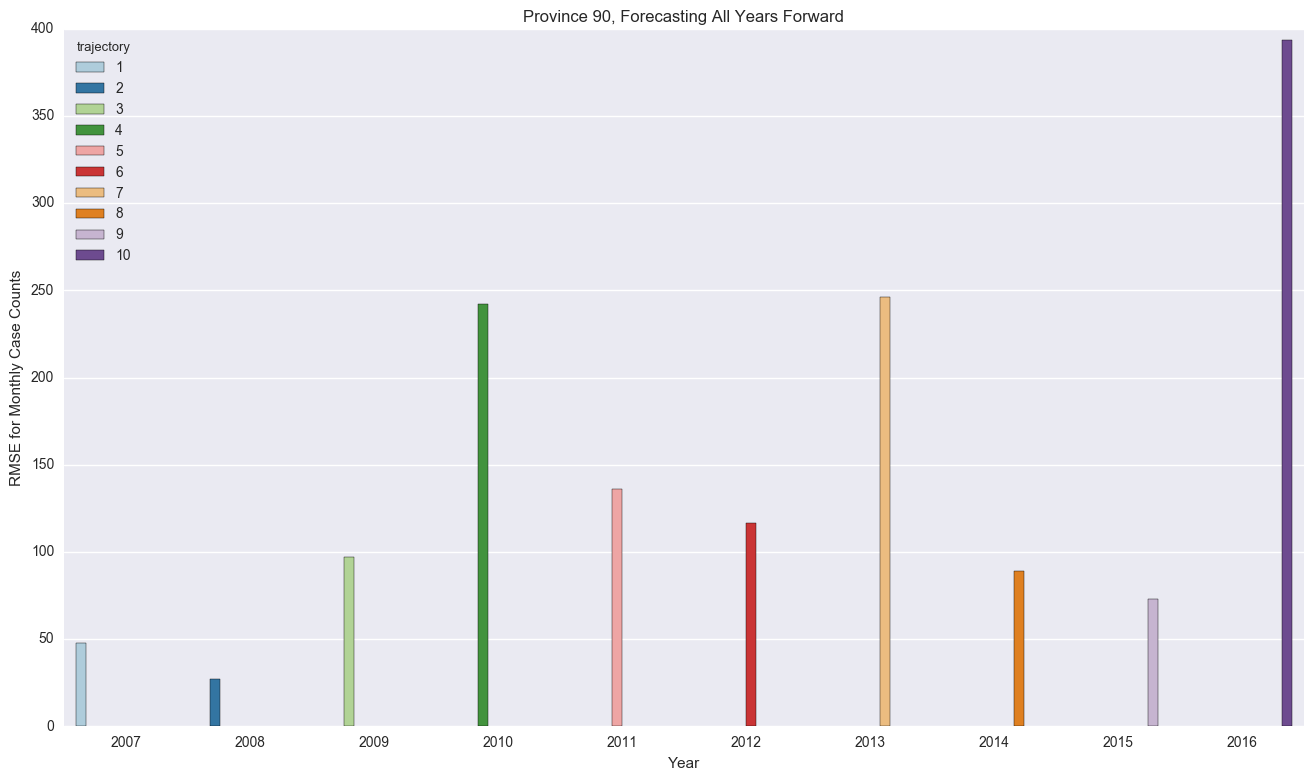

In [55]:
plt.subplots(figsize=(16,9))
# plt.rcParams['axes.facecolor'] = 'white'
# hue is either trajectory or how_many_years_out
ax = sns.barplot(x='year', y='monthly_case_rmse', data=prov_df, ci=0, hue='trajectory', palette='Paired')
ax.set(xlabel='Year', ylabel='RMSE for Monthly Case Counts')
plt.title('Province ' + str(province) + ', ' + 'Forecasting All Years Forward')
plt.show()

### Compare performance of the models numerically

Load the errors for each model
Compare each of the targets

In [20]:
'../../output/default_prophet/all_prov_monthly/all_prov_monthly_'

# one month out
m_prophet_default = load_error_df('../../output/default_prophet/all_prov_monthly/all_prov_monthly_', 1)
m_prophet_cp = load_error_df('../../output/prophet_changepoint_0.5/all_prov_monthly/all_prov_monthly_', 1)
m_hist_avg = load_error_df('../../output/hist_avg/all_prov_monthly/all_prov_monthly_', 1)

b_prophet_default = b_load_error_df('../../output/default_prophet/all_prov_biweekly/all_prov_biweekly_', 1)
b_prophet_cp = b_load_error_df('../../output/prophet_changepoint_0.5/all_prov_biweekly/all_prov_biweekly_', 1)
b_hist_avg = b_load_error_df('../../output/hist_avg/all_prov_biweekly/all_prov_biweekly_', 1)

b_hist_avg.head()

,province,year,monthly_case_rmse,year_total_error,peak_error,peak_month_error
0,10,2007,NaN,NaN,NaN,10
1,10,2008,NaN,NaN,NaN,9
2,10,2009,NaN,NaN,NaN,10
3,10,2010,NaN,NaN,NaN,9
4,10,2011,NaN,NaN,NaN,5
